# Investigating Temperature Change on Land in relation to Climate Change

## Introduction

Over the years, both [natural and anthropogenic influences](https://www.epa.gov/climatechange-science/causes-climate-change#:~:text=Human%20and%20natural%20factors%20both,observed%20over%20the%20last%20century.) have contributed to major changes in the Earth's climate. The increase in [land surface temperatures](https://earthobservatory.nasa.gov/global-maps/MOD_NDVI_M/MOD_LSTD_M#:~:text=Land%20surface%20temperature%20is%20a,cools%20more%20quickly%20than%20air.), a major sign of [global warming](https://www.nrdc.org/stories/global-warming-101#causes), is among the most alarming occurrences associated with these changes. In addition to demonstrating the magnitude of climate change, land temperature change offers information about wider implications for [ecosystems](https://australian.museum/learn/species-identification/ask-an-expert/what-is-an-ecosystem/#:~:text=An%20ecosystem%20is%20a%20community%20of%20organisms%20and%20their%20physical,nutrient%20cycles%20and%20energy%20flows.), [biodiversity](https://www.worldwildlife.org/pages/what-is-biodiversity#:~:text=Biodiversity%20is%20all%20the%20different,maintain%20balance%20and%20support%20life.), and human societies. These changes, which range from greater seasonal temperature variability to previously unheard-of peaks in recorded values, are a reflection of the growing effects of human activities including [industrialization](https://en.wikipedia.org/wiki/Industrialisation), [deforestation](https://education.nationalgeographic.org/resource/deforestation/), and [greenhouse gas emissions](https://www.ibm.com/think/topics/greenhouse-gas-emissions#:~:text=The%20release%20of%20certain%20gases,trap%20heat%20within%20our%20atmosphere.).

In Nigeria and around the world, the consequences of escalating temperatures are becoming ever more evident. The degradation of forests, the proliferation of urban landscapes, and the increasing dependence on [fossil fuels](https://en.wikipedia.org/wiki/Fossil_fuel) have collectively fostered a warming trend that jeopardizes the equilibrium of both natural ecosystems and human societies.

This study explores the trends in land temperature change over time, emphasizing how it relates to climate change and the impact of global climate events and policy. By examining decades' worth of temperature data, we hope to identify the patterns, fluctuations, and key milestones that characterize the current climate catastrophe and highlight how urgently meaningful action is needed to reduce its effects.


## Data Source

[FAOSTAT](https://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1029516/#:~:text=FAOSTAT%20is%20FAO's%20global%20statistical,the%20most%20recent%20year%20available.) is FAO’s global statistical database. It provides free access to food and agriculture data for over 245 countries and territories and covers all FAO regional groupings from 1961 to the most recent year available. 

The FAOSTAT Temperature change on land domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2023. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS). For more information, click [here](https://data.giss.nasa.gov/gistemp/)

In [2]:
#Extracting the files from the zipfile
import zipfile
with zipfile.ZipFile('Temperature_Change_Data.zip', 'r') as myzip:
    myzip.extractall()

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Loading in the dataset
temperature_change = pd.read_csv('Environment_Temperature_change_E_All_Data_(Normalized).csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 188: invalid start byte

**Due to the error above, the encoding of the "Temperature Change" Dataset needs to be investigated.**

In [4]:
#investigating the encoding of the dataset
import chardet
with open("Environment_Temperature_change_E_All_Data_(Normalized).csv", "rb") as file:
    output = chardet.detect(file.read())
    print(output)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [5]:
#loading in the temperature dataset again
temp_change = pd.read_csv('Environment_Temperature_change_E_All_Data_(Normalized).csv',
                                 encoding = 'Windows-1252')

#### Viewing and Investigating the Datasets

In [6]:
temp_change.head()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,7001,January,7271,Temperature change,1961,1961,°c,0.745,E
1,2,'004,Afghanistan,7001,January,7271,Temperature change,1962,1962,°c,0.015,E
2,2,'004,Afghanistan,7001,January,7271,Temperature change,1963,1963,°c,2.706,E
3,2,'004,Afghanistan,7001,January,7271,Temperature change,1964,1964,°c,-5.250,E
4,2,'004,Afghanistan,7001,January,7271,Temperature change,1965,1965,°c,1.854,E


In [7]:
temp_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563040 entries, 0 to 563039
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        563040 non-null  int64  
 1   Area Code (M49)  563040 non-null  object 
 2   Area             563040 non-null  object 
 3   Months Code      563040 non-null  int64  
 4   Months           563040 non-null  object 
 5   Element Code     563040 non-null  int64  
 6   Element          563040 non-null  object 
 7   Year Code        563040 non-null  int64  
 8   Year             563040 non-null  int64  
 9   Unit             563040 non-null  object 
 10  Value            537452 non-null  float64
 11  Flag             563040 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.5+ MB


It can be seen that the `Value` column is the only variable with  missing data

In [8]:
temp_change.describe()

,Area Code,Months Code,Element Code,Year Code,Year,Value
count,563040.000000,563040.000000,563040.00000,563040.000000,563040.000000,537452.000000
mean,874.326630,7009.882353,6674.50000,1992.712681,1992.712681,0.622356
std,1841.066052,6.037948,596.50053,18.174242,18.174242,0.819781
min,1.000000,7001.000000,6078.00000,1961.000000,1961.000000,-9.272000
25%,74.000000,7005.000000,6078.00000,1977.000000,1977.000000,0.274000
50%,150.000000,7009.000000,6674.50000,1993.000000,1993.000000,0.504000
75%,225.000000,7016.000000,7271.00000,2008.000000,2008.000000,0.962000
max,5873.000000,7020.000000,7271.00000,2023.000000,2023.000000,11.753000


In [9]:
#Checking the number of unique value in each column
temp_change.nunique()

Area Code           284
Area Code (M49)     284
Area                284
Months Code          17
Months               17
Element Code          2
Element               2
Year Code            63
Year                 63
Unit                  1
Value              8735
Flag                  2
dtype: int64

In [10]:
#Checking for duplicate rows
sum(temp_change.duplicated())

0

In [11]:
#Asserting if the "Year Code" and "Year" Columns are the same
are_the_two_cols_same = (temp_change['Year Code'] == temp_change['Year']).all()
print(f'{are_the_two_cols_same}: the two columns have the exact same values')

True: the two columns have the exact same values


*The `Year Code` column will be dropped*

## Handling Missing Data

When no data value is recorded for the variable in an observation, it is referred to as missing data or missing values in statistics. It can happen in a number of ways and for a number of reasons, including mistakes made during data collecting, problems with data input, or survey respondents declining to answer specific questions. Since missing data might have a substantial impact on the caliber of research and the reliability of conclusions derived from the data, it is imperative to comprehend and manage it.

There are several approaches to handling missing data, primarily categorized into imputation and deletion techniques. The imputation technique has to do with replacing missing values with the column's mean, median, or mode, predictive imputation, and multiple imputation. Imputation is recommended when the missing observation proportion is less than 5%.

Click [here](https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/#:~:text=When%20dealing%20with%20missing%20data,of%20missing%20data%20is%20low.), to know more about dealing with missing data.

In [12]:
#Assessing the proportion of missing data in the Value column 
missing_percent = (563040 - 537452) / 563040 * 100
print(f"Missing Percentage: {missing_percent:.2f}%")

Missing Percentage: 4.54%


*This value is less than 5%, hence its safe to populate the missing observations with the mean or median (as the `Value` column is a continuous variable)*

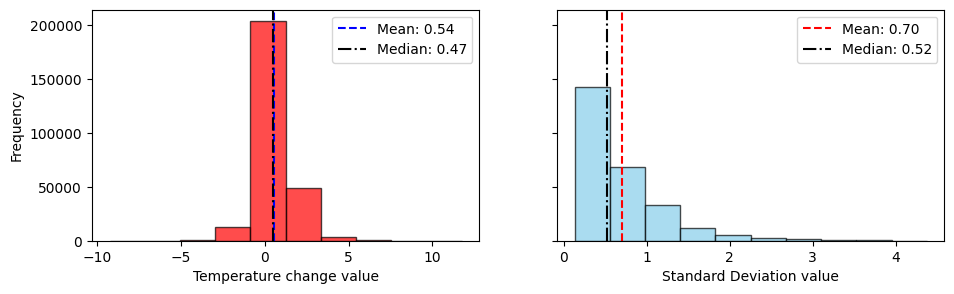

In [13]:
#Looking at the distribution of the "Value" column
temp = temp_change[temp_change['Element'] == "Temperature change"]
stD = temp_change[temp_change['Element'] == "Standard Deviation"]
mean_temp = np.mean(temp['Value']) # Calculate temperature mean
mean_std = np.mean(stD['Value']) # Calculate standard deviation mean
median_temp = temp.Value.median() # Calculate temperature median
median_std = stD.Value.median() # Calculate standard deviation median

#Plotting the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,3), sharey = True)
ax1.hist(temp['Value'], bins=10, color='red', edgecolor='black', alpha=0.7)                  
ax2.hist(stD['Value'], bins=10, color='skyblue', edgecolor='black', alpha=0.7) #second plot

# Adding mean and median line to the plots
ax1.axvline(mean_temp, color='blue', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_temp:.2f}')
ax1.axvline(median_temp, color='black', linestyle='-.', linewidth=1.5, label=f'Median: {median_temp:.2f}')
ax2.axvline(mean_std, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_std:.2f}')
ax2.axvline(median_std, color='black', linestyle='-.', linewidth=1.5, label=f'Median: {median_std:.2f}')


ax1.set_xlabel("Temperature change value")
ax2.set_xlabel("Standard Deviation value")
ax1.set_ylabel("Frequency")
ax1.legend()
ax2.legend()
plt.show()

*For the temperature change, it can be seen that the mean value is close to zero, and the distribution is looking symmetric, suggesting that the data is  normally distributed. Hence, it is safe to use the `mean` to impute missing data as the distribution indicates no outlier. While the standard deviation category is positively (right) skewed, though no outliers is obviously seen. Hence it will be more effective to fill in the missing values with the `median` value as it is less affected by extreme values.*

In [14]:
#Checking for outliers in the value column quantitatively
Q1t = temp.Value.quantile(0.25) #for temperature change category
Q3t = temp.Value.quantile(0.75)
IQRt = Q3t-Q1t
upper_bound = Q3t + (1.5*IQRt)
lower_bound = Q1t - (1.5*IQRt)

Q1s = stD.Value.quantile(0.25) #for standard deviation category
Q3s = stD.Value.quantile(0.75)
IQRs = Q3s-Q1s
upper_bound2 = Q3s + (1.5*IQRs)
lower_bound2 = Q1s - (1.5*IQRs)

temp_outliers = temp[(temp['Value'] == lower_bound) | (temp['Value'] == upper_bound)]
std_outliers = stD[(stD['Value'] == lower_bound) | (stD['Value'] == upper_bound)]

print(temp_outliers)
print(std_outliers)

Empty DataFrame
Columns: [Area Code, Area Code (M49), Area, Months Code, Months, Element Code, Element, Year Code, Year, Unit, Value, Flag]
Index: []
Empty DataFrame
Columns: [Area Code, Area Code (M49), Area, Months Code, Months, Element Code, Element, Year Code, Year, Unit, Value, Flag]
Index: []


*This output shows that the `value` column has no outlier for both the temperature change and standard deviation category, further buttressing the histogram plotted earlier*

## Data Cleaning

In [15]:
#Create a copy of the dataset
temp_change2 = temp_change.copy()

In [16]:
#pivoting the element column
temp_change2 = temp_change2.pivot(index=['Area Code', 'Area Code (M49)', 'Area', 'Months Code', 'Months', 'Year Code', 'Year', 
                          'Unit', 'Flag'], columns='Element',  values='Value').reset_index()
temp_change2.sample()

Element,Area Code,Area Code (M49),Area,Months Code,Months,Year Code,Year,Unit,Flag,Standard Deviation,Temperature change
109987,118,'414,Kuwait,7002,February,1966,1966,°c,E,1.666,1.135


In [17]:
#Changing the letter case of variables for easy use
temp_change2.rename(columns = lambda x:x.strip().replace(' ', '_').lower(), inplace = True)

temp_change2.head(1)

Element,area_code,area_code_(m49),area,months_code,months,year_code,year,unit,flag,standard_deviation,temperature_change
0,1,'051,Armenia,7001,January,1992,1992,°c,E,2.805,-2.405


In [18]:
#dropping the year code column
temp_change2.drop('year_code', axis = 1, inplace = True)


In [19]:
temp_change2.head(1)

Element,area_code,area_code_(m49),area,months_code,months,year,unit,flag,standard_deviation,temperature_change
0,1,'051,Armenia,7001,January,1992,°c,E,2.805,-2.405


In [20]:
mean_temp = np.mean(temp_change2['temperature_change']) 
mean_std = np.mean(temp_change2['standard_deviation'])

#Filling in the missing values
temp_change2.fillna({'temperature_change': 'mean_temp'}, inplace = True)
temp_change2.fillna({'standard_deviation': 'mean_std'}, inplace = True)

#Inspecting
temp_change2.isnull().sum()

Element
area_code             0
area_code_(m49)       0
area                  0
months_code           0
months                0
year                  0
unit                  0
flag                  0
standard_deviation    0
temperature_change    0
dtype: int64

In [21]:
#saving the new dataset as a CSV file (no need to run this as the file is already part of the zipfile)
temp_change2.to_csv("temperature_change_edited.csv", index = False)

## Data Visualizations

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib ipympl

#loading in the saved dataset for further analysis
temp_df = pd.read_csv("temperature_change_edited.csv", 
                      parse_dates = ['year']) #set the date column as date

temp_df

,area_code,area_code_(m49),area,months_code,months,year,unit,flag,standard_deviation,temperature_change
0,1,'051,Armenia,7001,January,1992-01-01,°c,E,2.805,-2.405
1,1,'051,Armenia,7001,January,1993-01-01,°c,E,2.805,-1.510
2,1,'051,Armenia,7001,January,1994-01-01,°c,E,2.805,1.970
3,1,'051,Armenia,7001,January,1995-01-01,°c,E,2.805,2.202
4,1,'051,Armenia,7001,January,1996-01-01,°c,E,2.805,0.844
...,...,...,...,...,...,...,...,...,...,...
285525,5873,'198,OECD,7020,Meteorological year,2019-01-01,°c,E,0.259,1.291
285526,5873,'198,OECD,7020,Meteorological year,2020-01-01,°c,E,0.259,1.431
285527,5873,'198,OECD,7020,Meteorological year,2021-01-01,°c,E,0.259,1.589
285528,5873,'198,OECD,7020,Meteorological year,2022-01-01,°c,E,0.259,1.237


In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #to reduce noise

### 1. How has the average temperature change evolved over the decades for Nigeria? 

In [5]:
from ipywidgets import widgets, interact

#summarizing the temperature value by decades
temp_df['decade'] = (temp_df['year'].dt.year // 10) * 10  #Extracting decades
sum_temp_df = temp_df.groupby(['area', 'decade'])['temperature_change'].agg([np.mean, np.std]).reset_index()

#Dropdown filtering function
def plot_area(selected_area):
    filtered_df = sum_temp_df[sum_temp_df['area'] == selected_area]
  
    #Extract x and y values for the annotation
    annotation_data = filtered_df[filtered_df['mean'] > 1]
    if not annotation_data.empty:
        xaxis = annotation_data['decade'].values[0]
        yaxis = annotation_data['mean'].values[0]
    else:
        xaxis, yaxis = None, None  #Fallback if no matching data is found
    
    #Plotting summarized data
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax = sb.lineplot(data = filtered_df, x = 'decade', y = 'mean', marker = 'o', 
                     linestyle = None,  color = 'r', label = "Avg Temp")
    ax.set_ylabel("Temperature change (°C)", fontsize = 12, fontweight = "bold")
    ax.set_title(f"Average Land Temperature Change in {selected_area} per Decade (1961-2023)", 
                 fontsize = 14, fontweight = "bold")
    ax.set_xlabel("Decades", fontsize = 12, fontweight = "bold")
    
    # Add annotation if data is found
    if xaxis is not None and yaxis is not None:
        ax.annotate(">1 degree", xy = (xaxis, yaxis), xytext = (xaxis - 5, yaxis - 0.8), 
            arrowprops = {"arrowstyle": "->", "color": "gray"})
    plt.legend()
    plt.show()

# Dropdown widget
area_dropdown = widgets.Dropdown(
    options = temp_df.area.unique(),
    value = 'Nigeria',
    description = 'Country/Region')

# Interacting function
interact(plot_area, selected_area = area_dropdown);

interactive(children=(Dropdown(description='Country/Region', index=147, options=('Armenia', 'Afghanistan', 'Al…

*There was an increasing trend in the temperature change for Nigeria over the decades (1960-2020). Also, although the temperature change surpassed 1&deg;C in 2010, it never got to 1.5&deg;C.*

*This increment in temperature over time indicates global warming or regional climate change, potentially linked to anthropogenic activities such as deforestation, urbanization, or greenhouse gas emissions. This may also explain the current [biodiversity loss](https://www.thecable.ng/biodiversity-in-nigeria-challenges-and-opportunities/) in the area (Nigeria). The WWF also recorded that Nigeria lost 1 million hectares of forest land between 2000 and 2015 due to logging, mining activities, infrastructure projects such as roads and dams, and land clearing for agriculture such as cocoa cultivation. Such activities can lead to both carbon sink and biodiversity loss.*

### 2. Are there discernible trends in the Global standard deviation of temperature changes over the years?

In [6]:
#list of areas that are not countries (aggregates)
not_a_country = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union (27)',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD']

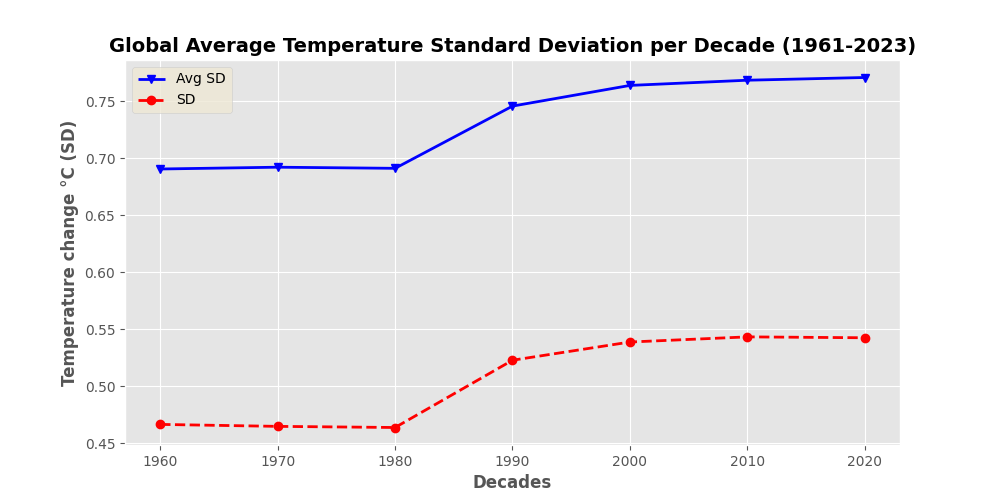

In [7]:
import mplcursors

countries = temp_df[~(temp_df['area'].isin(not_a_country))] #filtering by countries only
sum_SD_df = countries.groupby('decade')['standard_deviation'].agg([np.mean, np.std]).reset_index()

#plotting the chart
fig, ax = plt.subplots(figsize = [10, 5])
plt.style.use('Solarize_Light2')
ax.plot(sum_SD_df['decade'], sum_SD_df['mean'], marker = 'v', color = 'b', label = "Avg SD")
ax.plot(sum_SD_df['decade'], sum_SD_df['std'], marker = 'o', linestyle = '--',  color = 'r', label = "SD")
ax.set_title("Global Average Temperature Standard Deviation per Decade (1961-2023)", 
            fontsize = 14, fontweight = 'bold')
ax.set_ylabel("Temperature change °C (SD)", fontsize = 12, fontweight = 'bold')
ax.set_xlabel("Decades", fontsize = 12, fontweight = 'bold')
ax.legend()

#Adding cursor functionality
cursor = mplcursors.cursor(ax.lines, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text( f"Decade: {sel.target[0]:.0f}\nValue: {sel.target[1]:.4f}"))

plt.show()

*The Standard Deviation (SD) of temperature change recorded for each year in each area was collected and the average SD per decade for countries in the `area` column was computed and plotted on the line pot above.*

*From 1960 to 1980, the average standard deviation fluctuates slightly but remains relatively stable around 0.687 and its SD was also relatively stable at 0.467. This indicates a relatively consistent level of variability in temperature changes and its standard deviation during these decades. A sharp increase begins in 1990 (0.741496) and continues through 2020 (0.765850). This trend suggests a growing variability in temperature changes over time. The SD values rise from 0.528540 in 1990 to 0.547976 in 2020 suggesting that the temperature variability itself is becoming less consistent across the countries. It can also be seen that the increase in variability is more pronounced in the 21st century, with values rising steadily from 0.759570 in 2000 to 0.765850 in 2020. After 1990, the average SD and its SD both increased simultaneously, indicating that patterns of global temperature are becoming more complex.*

*The increasing standard deviation indicates rising disparities in temperature changes globally and [post-1990](https://www.researchgate.net/publication/289678817_Evaluating_global_warming_A_post-1990s_perspective) trend coincides with accelerated global warming, industrialization, and greenhouse gas emissions, which are likely contributors to greater variability. Although the [1990s](https://www.researchgate.net/figure/The-1990s-was-the-warmest-decade-ever-recorded-instrumentally-The-last-100-years-were_fig3_253251122) recorded one of the warmest period, a [research](https://www.theguardian.com/environment/2010/jan/29/water-vapour-climate-change#:~:text=The%20research%2C%20led%20by%20one,human%20emissions%20of%20greenhouse%20gases.), headed by one of the world's leading climate scientists indicates that, rather than human greenhouse gas emissions, a rise in water vapor in the upper atmosphere was responsible for over one-third of the global warming observed in the 1990s.*

### 3. Are there recurring patterns in temperature changes across months within a year?

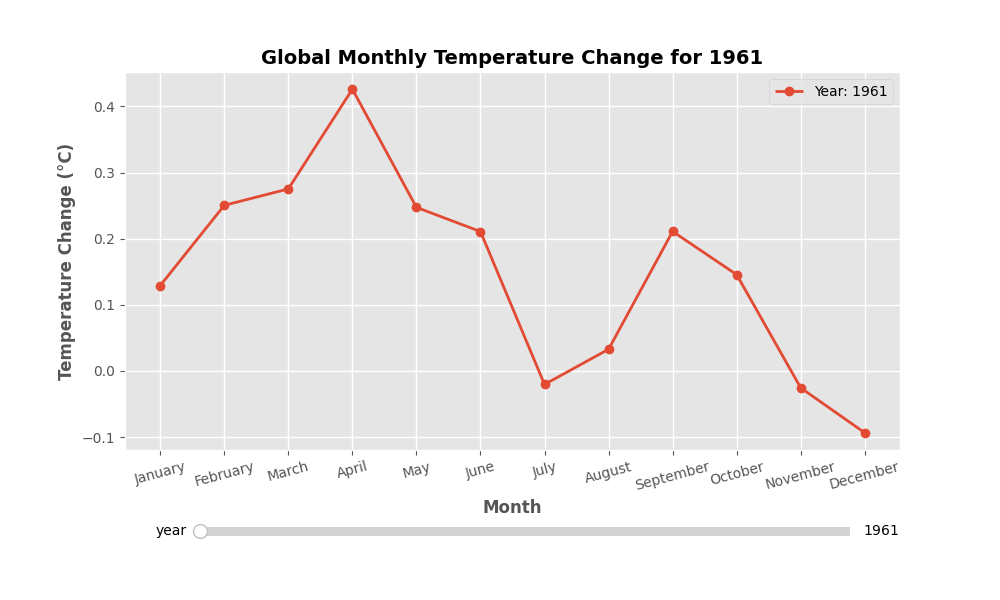

In [8]:
from matplotlib.widgets import Slider

countries = temp_df[~(temp_df['area'].isin(not_a_country))]
monthly_temp = countries[~(countries['months'].isin(['Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year']))]
monthly_temp.loc[:, 'year'] = monthly_temp['year'].dt.year
sum_month_temp = monthly_temp.groupby(['year', 'months'])['temperature_change'].mean().reset_index()

# Define the chronological order of months
month_order = ["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]

# Convert the 'Month' column to a categorical type with ordered months
sum_month_temp['months'] = pd.Categorical(sum_month_temp['months'], categories=month_order, ordered=True)
sum_month_temp = sum_month_temp.sort_values(by = ["year", "months"], ascending = [True, True])

#Prepare unique years and months
years = sum_month_temp['year'].unique()
months = sum_month_temp['months'].unique()

#Function to get data for a specific year
def get_year_data(year):
    year_data = sum_month_temp[sum_month_temp["year"] == year]
    return year_data["months"].astype(str), year_data["temperature_change"]

#first year data (initial data)
first_year = years[0]
x, y = get_year_data(first_year)

#Creating the plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)  # Make space for the slider

line, = ax.plot(x, y, marker='o', label=f"Year: {first_year}")
ax.set_title(f"Global Monthly Temperature Change for {first_year}", fontsize=14, fontweight="bold")
ax.set_xlabel("Month", fontsize=12, fontweight="bold")
ax.set_ylabel("Temperature Change (°C)", fontsize=12, fontweight="bold")
labels = monthly_temp.months.unique()
ax.tick_params("x", rotation=15)
ax.legend()

# Add a Slider widget
slider_ax = plt.axes([0.2, 0.1, 0.65, 0.03])  # Position: [left, bottom, width, height]
slider = Slider(slider_ax, "year", years.min(), years.max(), valinit=first_year, valstep=1)

# Update function for slider
def update(val):
    selected_year = int(slider.val)
    x, y = get_year_data(selected_year)  # Get data for the selected year
    line.set_data(x, y)  # Update line data
    ax.set_title(f"Global Monthly Temperature Change for {selected_year}", fontsize=14, fontweight="bold") #Update title
    line.set_label(f"Year: {selected_year}")  # Update legend
    ax.legend()
    ax.relim()  # Recalculate limits
    ax.autoscale_view()
    fig.canvas.draw_idle()  # Redraw the canvas

slider.on_changed(update)

plt.show();


_For the first year (1961) of measurement, the highest land temperature change was recorded in April (Spring), and this change was not up to 0.5°C. The early-winter period (december) also recorded the lowest temperature change value, though it picked up the next year (1962) in January and significantly dropped again in February. The value of the temperature change began to decrease and stayed comparatively low and steady for subsequent years until 1966 and 1969 where the temperature change got back to nearly 0.6°C and 0.5°C respectively like the base line year._

_In 1970, the first [World Earth Day](https://en.wikipedia.org/wiki/Earth_Day) was celebrated, the peak temperature change at the time was not up to 0.4°C, and the least temperature recorded in early-winter (December) was just a little below -0.1°C. Five years after that, the temperature change across the year (1975) was quite low. The highest value was recorded in January (around 0.25°C), with December recording a temperature change of nearly -0.4°C, this may be as a result of early changes in awareness and initial policy shifts. Investigating further, five years later, it can be seen that the temperature change has increased since 1975, with the peak temperature change value (close to 0.35°C) recorded in late-winter (February), and December having a value very close to but not equal to -0.1°C._

_1988 recorded the **highest** (close to **0.85°C**) temperature change value since the baseline year in mid-winter (January). The year also birthed the formation of [The Intergovernmental Panel on Climate Change (IPCC)](https://www.ipcc.ch/about/history/#:~:text=The%20Intergovernmental%20Panel%20on%20Climate%20Change%20(IPCC)%20was%20established%20by,UN%20General%20Assembly%20in%201988.) with the primary aim of providing policymakers, governments, and the public with regular assessments of the scientific basis of climate change, its impacts, and potential adaptation and mitigation strategies. In 1992, four years later—after the [Rio Earth Summit](https://guides.loc.gov/brazil-us-relations/rio-earth-summit-1992#:~:text=The%20first%20United%20Nations%20Conference,and%20protection%20from%20hazardous%20waste.), the peak temperature change value (around 0.4°C) recorded in summer (August) was much lower than that of 1988, and the least temperature for the year was in mid-autumn (October) (0°C<x<-0.1°C). To understand better the long-term perspective of land temperature change based on the IPCC's influence over the years, looking at the start of the 21st century (2000), the least temperature change (almost 0.5°C) recorded in mid-winter (January) was higher than the peak value in 1992, and its peak (a little above 1.1°C) was seen in spring (April). This could be as result of the indirect effect of the [political challenges](https://as.nyu.edu/content/dam/nyu-as/environment/documents/faculty-profiles/Dale_Jamieson-article.pdf?utm_source=chatgpt.com) faced by IPCC, like the political disputes such as those during the [Kyoto Protocol](https://en.wikipedia.org/wiki/Kyoto_Protocol) negotiations (1997), that delayed meaningful international action on implementation of effective climate policies. The increase in temperature change can also be attributed to the expansion of industrial activities by rapidly developing economies, which led to an increase in [greenhouse gas emissions](https://en.wikipedia.org/wiki/Greenhouse_gas_emissions)
, especially CO2. The Kyoto Protocol came into force in 2005, yet the peak land temperature change values never went below 1.0°C. Five years later (in 2010), the temperature change value hit a new high of almost 1.4°C in early spring (March)._

_In 2015, the least temperature recorded was in mid-spring (April), while the peak temperature change (**1.60°C**) was seen in Early winter (December). This is the **highest** since 1988. Such reading may also be one of the contributing factor to the [Paris Climate Agreement](https://www.un.org/en/global-issues/climate-change#:~:text=At%20the%2021st%20Conference%20of,have%20ratified%20the%20Paris%20Agreement.) with an overarching goal to enhance sustainable development, reduce global warming, and increase resilience to the effects of climate change. Continuing to the next year (2016), the temperature dropped in mid-winter (January) and rose again in late-winter to about 1.85°C. Subsequent years (2017 & 2018) revealed that the peak temperature change remained relatively stable around 1.5°C during the spring period, then continued to rise from 2019, with 2020 and 2023 recording peak temperatures of **1.93°C** and **2.0°C** in late-winter and early-autumn respectively. These were the highest land temperature change recorded since 1961._

### 4. How does the global temperature change from the first decade of the dataset compare to the last decade?

The difference in the temperature change of the first decade in comparison to the last decade is 1.40 °C


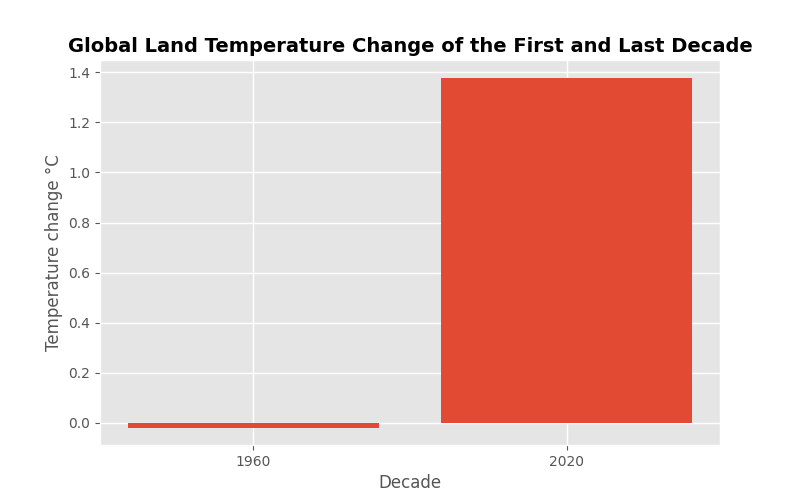

In [9]:
#Don't forget to filter by countries only
countries = temp_df[~(temp_df['area'].isin(not_a_country))]
first_decade = countries.groupby('decade')['temperature_change'].mean().values[0]
last_decade = countries.groupby('decade')['temperature_change'].mean().values[-1]
difference = last_decade - first_decade
print(f"The difference in the temperature change of the first decade in comparison to the last decade is \033[1m{difference:0.2f} °C\033[0m")

#create the plot
ind = np.arange(2)
labels = ["1960", "2020"]
fig, ax = plt.subplots(figsize = [8, 5])
ax.bar(ind, [first_decade, last_decade])
ax.set_title("Global Land Temperature Change of the First and Last Decade", fontsize = 14, fontweight = 'bold')
ax.set_xlabel("Decade", fontsize = 12)
ax.set_ylabel("Temperature change °C", fontsize = 12)
ax.set_xticks(ind)
ax.set_xticklabels(labels);

*These difference of **1.40°C** between the first and last decade suggests a rapidly significant warming trend, possibly due to [climate change](https://www.un.org/en/climatechange/what-is-climate-change) or other environmental factors.*

*The Intergovernmental Panel on Climate Change (IPCC) emphasizes that a [1.5°C global increase](https://www.ipcc.ch/sr15/) over pre-industrial levels is linked to serious threats to ecosystems and human systems, making a 1.40°C increase extremely significant.
A sixty-year increase of 1.40°C signifies a substantial and concerning long-term warming trend that is greater than historical natural variability.*

### 5. Are there any years with extreme temperature changes compared to the long-term average?

Using the [2-SD rule or 95th percentile rule](https://calculator.academy/2-standard-deviation-rule-calculator/), any value that goes above or below the lower and upper threshold respectively (for the 2-SD), or the 95th and 5th percentile will be considered extreme or unusual.

In [10]:
#Filtering by countries only
countries = temp_df[~(temp_df['area'].isin(not_a_country))]
yearly_temp = countries.groupby('year')['temperature_change'].mean().reset_index()
avg_temp_change, std = countries['temperature_change'].agg([np.mean, np.std])

#get the 95th and 5th percentile
percentile_95 = np.quantile(countries['temperature_change'], 0.95) 
percentile_5 = np.quantile(countries['temperature_change'], 0.05) 

#get the upper and lower threshold for the 2-SD rule
upper_threshold = avg_temp_change + (2*std)
lower_threshold = avg_temp_change - (2*std)

extreme_temp1 = yearly_temp.query(f'temperature_change > {percentile_95} | temperature_change < {percentile_5}')
extreme_temp2 = yearly_temp.query(f'temperature_change > {upper_threshold} | temperature_change < {lower_threshold}')

if not extreme_temp1.empty and extreme_temp2.empty:
    print(extreme_temp1)
    print(extreme_temp2)
else:
    print("\033[1mNo year recorded an unusual or extreme temperature change value\033[0m")

No year recorded an unusual or extreme temperature change value


### 6. What is the rate of temperature change per year for each area?

In [11]:
#summarize the temp_df by area and year
summary_df = temp_df.groupby(['area', 'year'])['temperature_change'].mean().reset_index()

def area_plot(selected_area):
    filtered_df = summary_df[summary_df['area'] == selected_area]
    
    #Calculating the linear trend line
    year = filtered_df['year']
    year_int = filtered_df['year'].dt.year.astype('int64')
    temp_change = filtered_df['temperature_change']
    slope, intercept = np.polyfit(year_int, temp_change, 1)
    poly = np.poly1d([slope, intercept]) #Create a polynomial from the slope and intercept
    
    #plot the linechart with trend line
    plt.style.use('bmh')
    fig, ax = plt.subplots(figsize = [10,6])
    ax.plot(year, temp_change, label='Temperature Change')
    ax.plot(year, poly(year_int), label='Linear Trend', linestyle='--') #plot the linear trend line
    ax.set_ylabel("Temperature Change (°C)", fontsize=12)
    ax.set_title(f"Land Temperature Change Rate in {selected_area} per year (1961-2023)", fontsize=14)
    ax.set_xlabel("Years", fontsize = 12)
    
    # Add annotations with slope and intercept
    ax.annotate(f'Slope: {slope:.2f}°C/year', xy=(0.3, 0.95), xycoords='axes fraction')
    ax.annotate(f'Intercept: {intercept:.2f} °C', xy=(0.3, 0.9), xycoords='axes fraction')
    ax.legend()
    plt.show()

#Dropdown widget
area_dropdown = widgets.Dropdown(
    options = summary_df.area.unique(),
    value = 'Afghanistan',
    description = 'Country/Region')

interact(area_plot, selected_area = area_dropdown);

interactive(children=(Dropdown(description='Country/Region', options=('Afghanistan', 'Africa', 'Albania', 'Alg…

*Most areas recorded a positive slope, indicating that for every year that passes, there is an increment in land temperature change.*

## Limitation(s)
- The country/region that makes up the global analysis, do not have every single area of the world in it.

## Conclusion

According to the analysis, there has been a notable and alarming warming trend in Nigeria and around the world over the past 60 years, with an average increase in land temperature change of 1.40°C. This trend is consistent with the effects of regional and global climate change, which are influenced by human activities like urbanization, deforestation, and greenhouse gas emissions. 

The variability in temperature change, as shown by rising standard deviation, has also increased, especially after 1990, reflecting accelerated industrialization and policy delays such as those during the Kyoto Protocol negotiations. Although global initiatives like the 1988 establishment of the IPCC and the 2015 Paris Climate Agreement have attempted to lessen these impacts, the data emphasizes the enduring difficulties and the pressing need for more robust climate action. Rising global temperature differences and their dire ecological effects highlight the urgent need for concerted, long-term measures to mitigate climate change and improve environmental resilience.